In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
def date_close_plot(data_frame):
    labels = []
    ticks = []
    
    prev = pd.Timestamp(data_frame['date'][0])
    prev_year = prev.year ##
    count = 0

    for row in data_frame['date']: ##

        date = pd.Timestamp(row)
        year = date.year

        if year != prev_year:
            labels.append(year)
            ticks.append(row)

        prev_year = year


    # Creating the Time Series chart.
    x_values = data_frame["date"] ##
    y_values = data_frame["close"] ##

    plt.figure(figsize=(20,10))
    plt.plot(x_values, y_values)
    plt.xticks(ticks, labels = labels)

    plt.title("")
    plt.xlabel("YEAR", size = 14)
    plt.ylabel("")

    plt.grid()
    plt.show()


In [4]:
file = "Resources/"

In [5]:
oil_df = pd.read_csv(file + "oil_csv.csv")
oil_df

,date,symbol,open,high,low,close,daily change (%)
0,2011-04-21,OIL,49.94,50.3500,49.90,50.35,0.820985
1,2011-04-25,OIL,50.57,50.5700,49.91,50.05,-1.028278
2,2011-04-26,OIL,50.18,50.4300,50.10,50.30,0.239139
3,2011-04-27,OIL,50.35,50.8500,49.80,50.81,0.913605
4,2011-04-28,OIL,50.78,51.1600,50.17,50.70,-0.157542
...,...,...,...,...,...,...,...
2965,2023-02-02,OIL,29.06,29.2882,28.70,28.85,-0.722643
2966,2023-02-03,OIL,28.94,29.6500,27.95,27.95,-3.420871
2967,2023-02-06,OIL,28.29,28.4700,27.63,28.47,0.636267
2968,2023-02-07,OIL,28.52,29.5000,28.52,29.50,3.436185


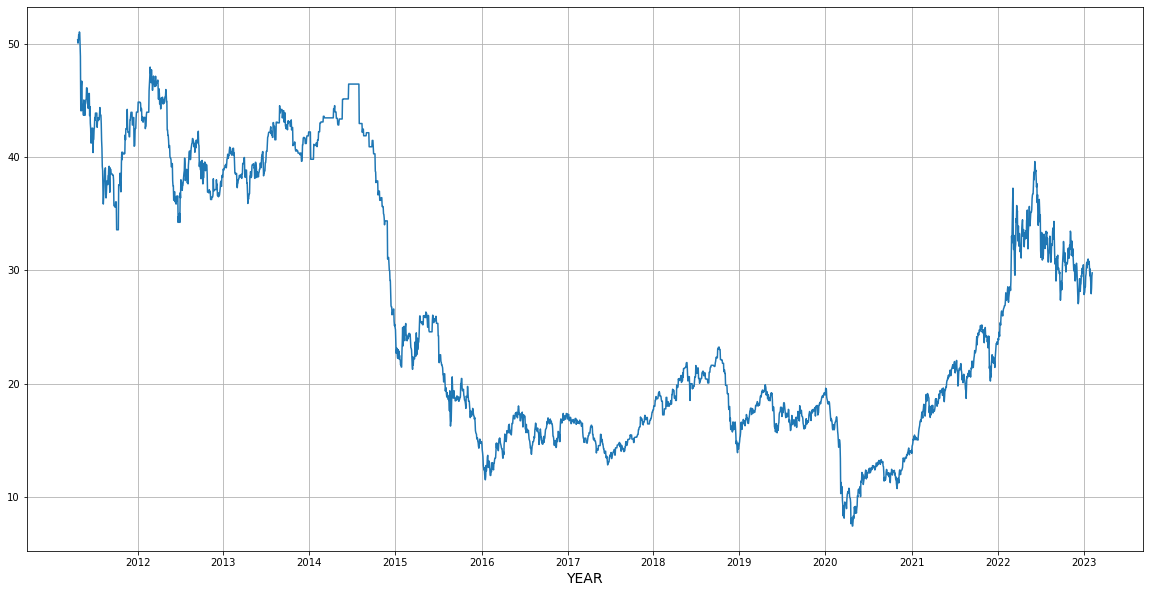

In [6]:
date_close_plot(oil_df)

In [7]:
gold_df = pd.read_csv(file+"gold_csv.csv")
gold_df

,date,symbol,open,high,low,close,daily change (%)
0,1999-11-01,GOLD,18.00,18.060,17.56,17.81,-1.055556
1,1999-11-02,GOLD,17.81,18.250,17.63,18.25,2.470522
2,1999-11-03,GOLD,18.19,18.250,17.75,17.88,-1.704233
3,1999-11-04,GOLD,17.69,17.940,17.56,17.69,0.000000
4,1999-11-05,GOLD,17.56,17.690,17.13,17.19,-2.107062
...,...,...,...,...,...,...,...
5851,2023-02-02,GOLD,20.19,20.190,19.17,19.40,-3.912828
5852,2023-02-03,GOLD,18.80,18.825,18.20,18.32,-2.553191
5853,2023-02-06,GOLD,18.21,18.440,18.11,18.35,0.768808
5854,2023-02-07,GOLD,18.35,18.690,18.19,18.50,0.817439


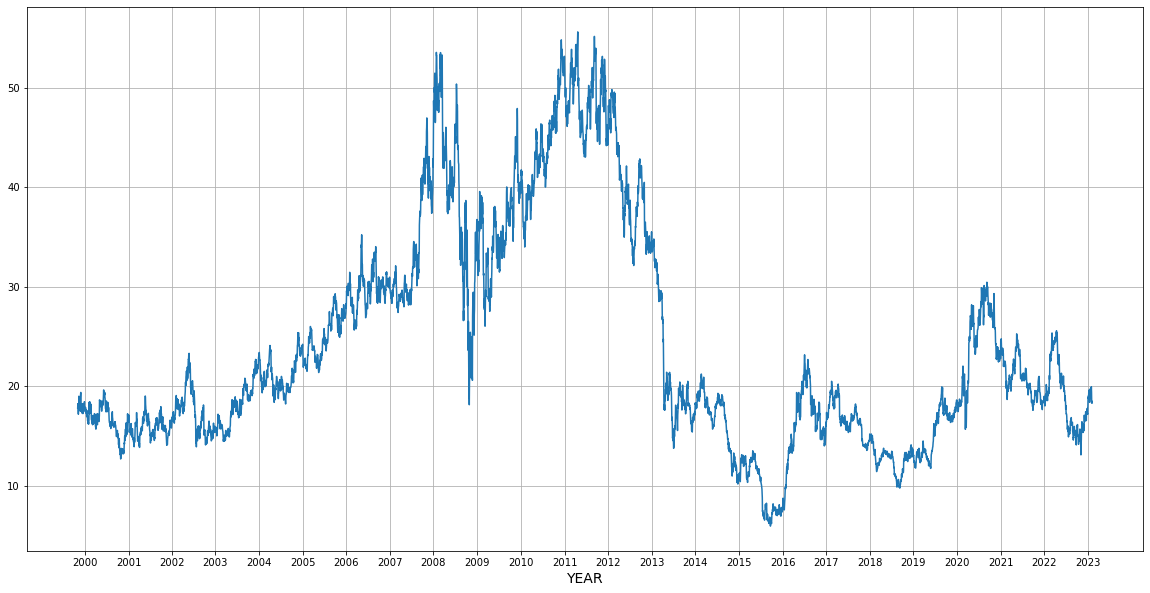

In [8]:
date_close_plot(gold_df)

In [9]:
sp500_df = pd.read_csv(file + "sphq_csv.csv")
sp500_df

,date,symbol,open,high,low,close,daily change (%)
0,2005-12-06,SPHQ,15.47,15.6900,15.4700,15.60,0.840336
1,2005-12-07,SPHQ,15.60,15.6200,15.4200,15.44,-1.025641
2,2005-12-08,SPHQ,15.45,15.5800,15.4390,15.52,0.453074
3,2005-12-09,SPHQ,15.59,15.7400,15.4700,15.57,-0.128287
4,2005-12-12,SPHQ,15.75,15.8000,15.5900,15.67,-0.507937
...,...,...,...,...,...,...,...
4318,2023-02-03,SPHQ,46.70,47.2225,46.6601,46.78,0.171306
4319,2023-02-06,SPHQ,46.54,46.7000,46.3610,46.53,-0.021487
4320,2023-02-07,SPHQ,46.44,47.3400,46.4200,47.21,1.658053
4321,2023-02-08,SPHQ,47.03,47.1500,46.5200,46.58,-0.956836


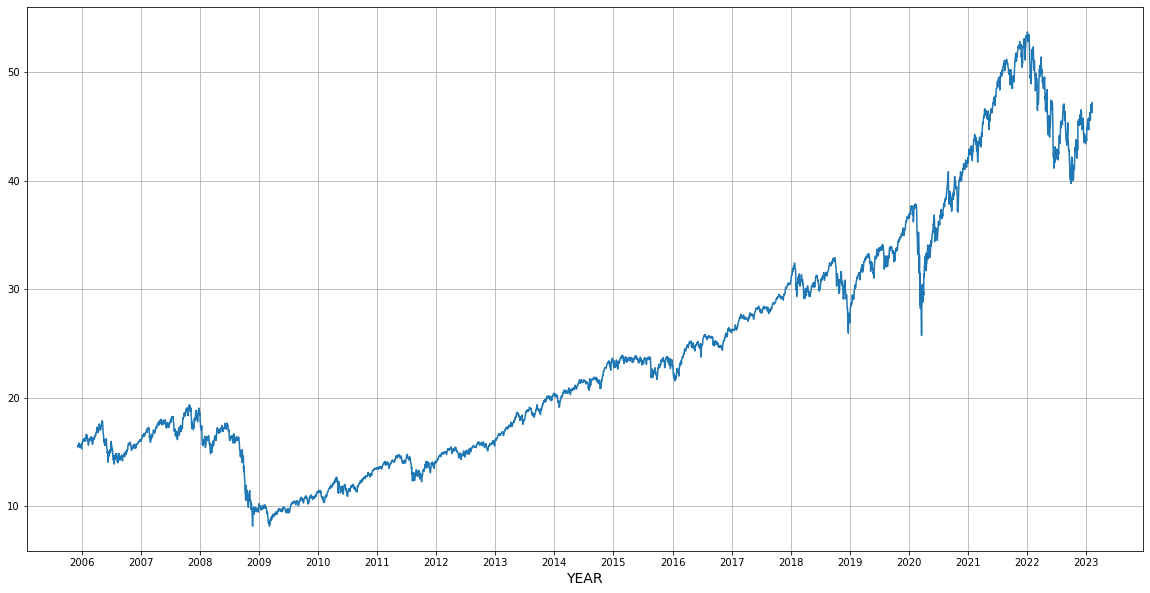

In [10]:
date_close_plot(sp500_df)

In [19]:
bitcoin_df = pd.read_csv(file + "btc_joined.csv")
bitcoin_df

,date,symbol,open,high,low,close,daily change (%)
0,2023-02-09,BTC,22961.850000,23011.390000,22926.350000,22968.100000,0.027219
1,2023-02-08,BTC,23242.420000,23452.000000,22665.850000,22963.000000,-1.202198
2,2023-02-07,BTC,22762.520000,23350.250000,22745.780000,23240.460000,2.099680
3,2023-02-06,BTC,22932.910000,23158.250000,22628.130000,22762.520000,-0.742993
4,2023-02-05,BTC,23327.660000,23433.330000,22743.000000,22932.910000,-1.692197
...,...,...,...,...,...,...,...
3522,2020-09-07,BTC,10174.863432,10355.652495,10014.277661,10207.605003,0.321789
3523,2020-09-08,BTC,10265.742989,10383.119236,9891.734243,10381.776107,1.130294
3524,2020-09-09,BTC,10381.676816,10444.171125,9868.937984,10043.196441,-3.260363
3525,2020-09-10,BTC,10136.560835,10352.415189,9989.510556,10268.460916,1.301231


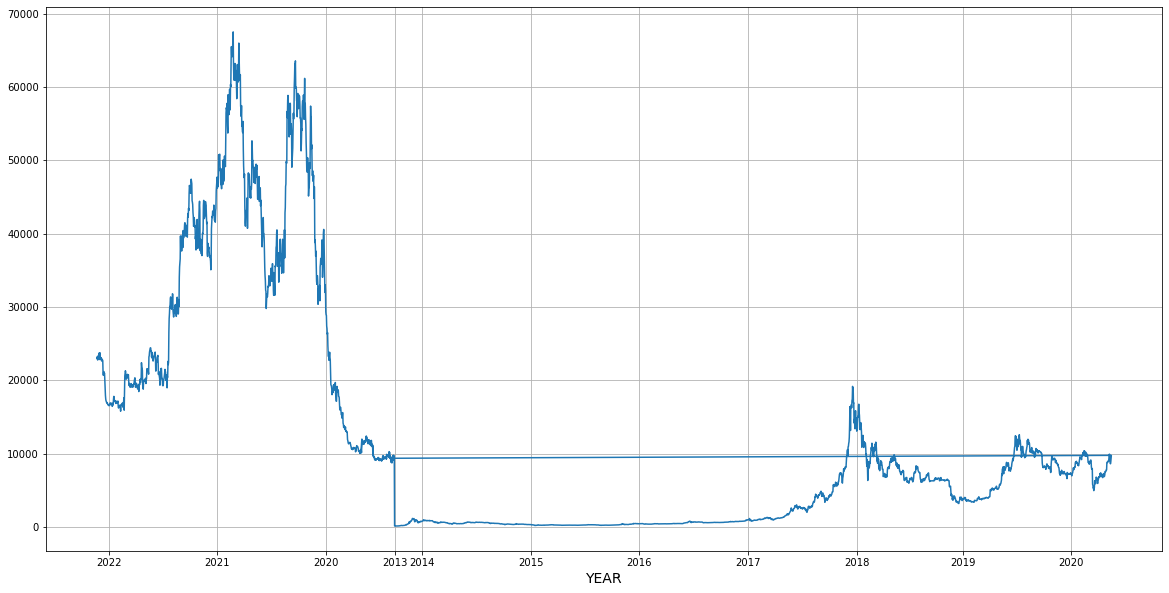

In [12]:
date_close_plot(bitcoin_df)

In [13]:
# Bitcoin & SP500
btc_sp500_df = bitcoin_df.merge(sp500_df,how='inner',on = 'date')
btc_sp500_df2 = btc_sp500_df.rename(columns = {'close_x':"btc close", 'close_y':"sp500 close"})
clean_btc_sp_df = btc_sp500_df2[['date','btc close','sp500 close']]
clean_btc_sp_df

,date,btc close,sp500 close
0,2023-02-09,22968.100000,46.31
1,2023-02-08,22963.000000,46.58
2,2023-02-07,23240.460000,47.21
3,2023-02-06,22762.520000,46.53
4,2023-02-03,23431.900000,46.78
...,...,...,...
2428,2020-05-11,8786.655182,34.08
2429,2020-05-12,8608.125245,33.36
2430,2020-05-13,8815.231245,32.93
2431,2020-05-14,9330.986485,33.38


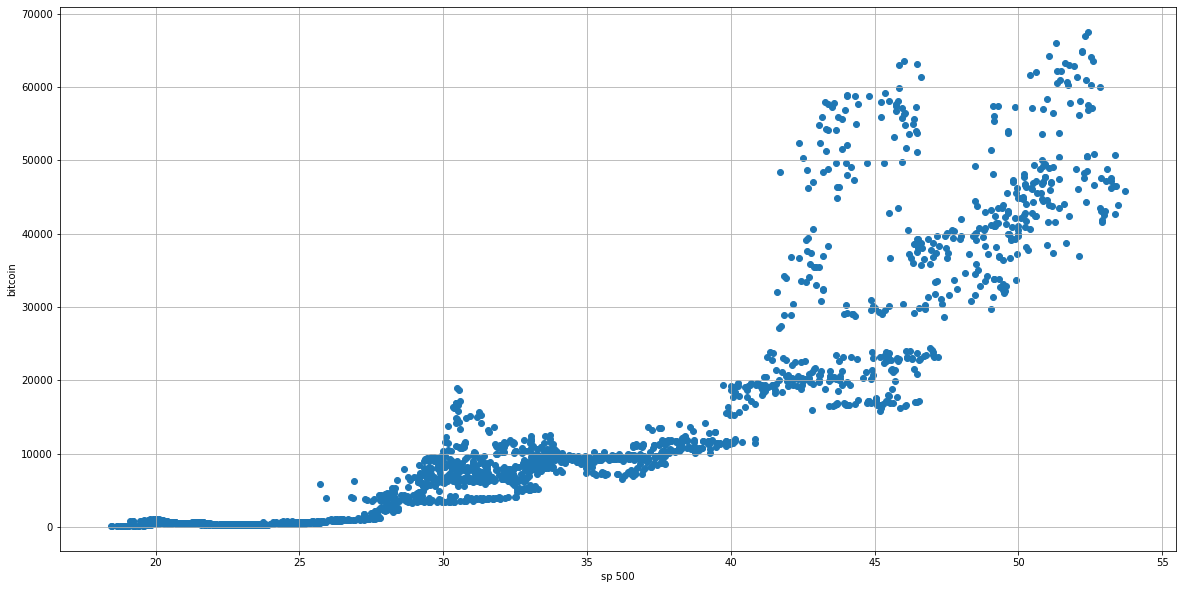

In [14]:
# def date_close_plot(data_frame):
# labels = []
# ticks = []

# prev = pd.Timestamp(data_frame['date'][0])
# prev_year = prev.year ##
# count = 0

# for row in data_frame['date']: ##

#     date = pd.Timestamp(row)
#     year = date.year

#     if year != prev_year:
#         labels.append(year)
#         ticks.append(row)

#     prev_year = year


# Creating the Time Series chart.
x_values = clean_btc_sp_df["sp500 close"] ##
y_values = clean_btc_sp_df["btc close"] ##

plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values)
# plt.xticks(ticks, labels = labels)

plt.title("")
plt.xlabel("sp 500")
plt.ylabel("bitcoin")

plt.grid()
plt.show()


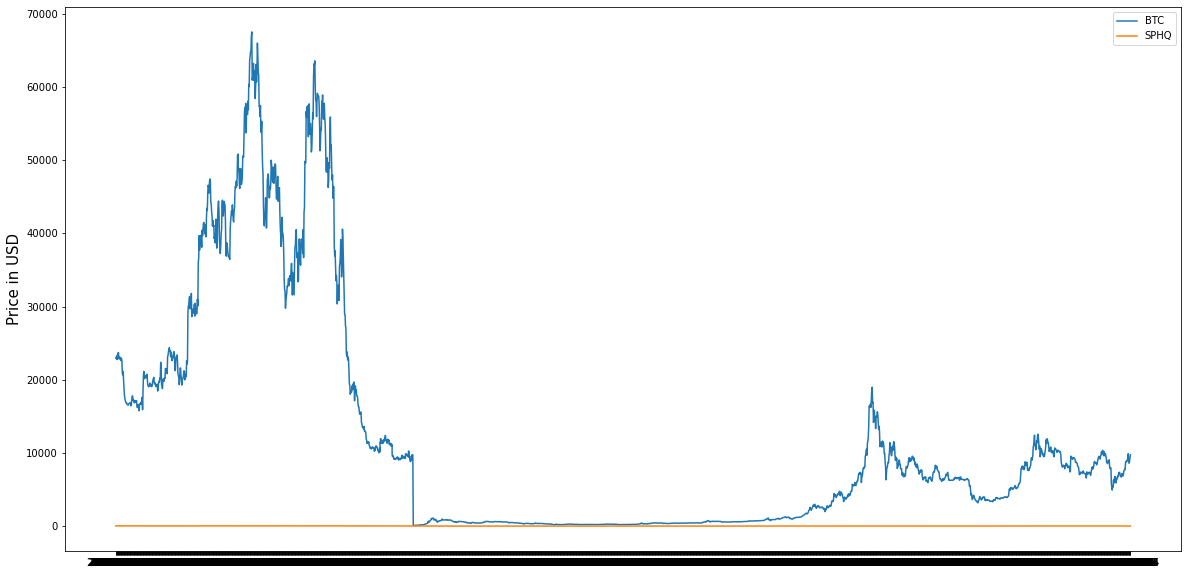

In [15]:
x2 = clean_btc_sp_df['date']
y2 = clean_btc_sp_df["btc close"]

x3 = clean_btc_sp_df['date']
y3 = clean_btc_sp_df["sp500 close"]





plt.figure(figsize=(20,10))

# plt.plot(x, y, label='OIL')
plt.plot(x2, y2, label='BTC')
plt.plot(x3, y3, label='SPHQ')



plt.legend(loc='upper right')

plt.ylabel("Price in USD", fontsize=15)


plt.show()


In [20]:
gold_sp500_df = bitcoin_df.merge(sp500_df,how='inner',on = 'date')
gold_sp500_df = gold_sp500_df.rename(columns = {'daily change (%)_x':"btc daily change", 'daily change (%)_y':"sp500 daily change"})
gold_sp500_df = gold_sp500_df[['date','btc daily change','sp500 daily change']]

gold_sp500_df

,date,btc daily change,sp500 daily change
0,2023-02-09,0.027219,-1.468085
1,2023-02-08,-1.202198,-0.956836
2,2023-02-07,2.099680,1.658053
3,2023-02-06,-0.742993,-0.021487
4,2023-02-03,-0.244494,0.171306
...,...,...,...
2428,2020-05-11,-8.628217,1.007706
2429,2020-05-12,-1.437118,-2.570093
2430,2020-05-13,2.405999,-1.140799
2431,2020-05-14,5.748167,2.141983


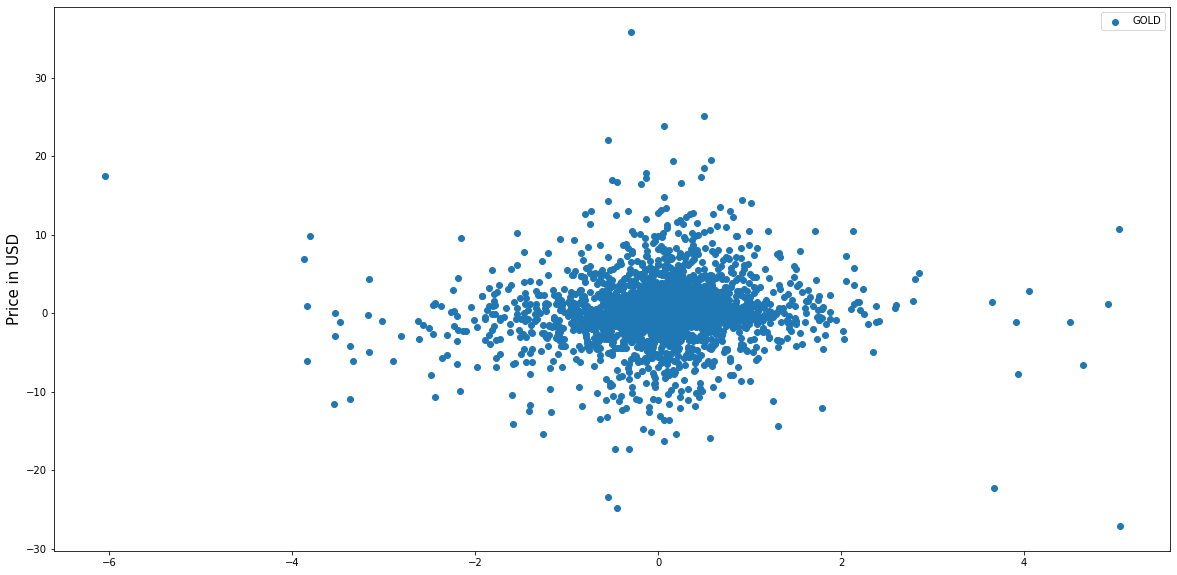

In [22]:
x2 = gold_sp500_df['date']
y2 = gold_sp500_df["btc daily change"]

x3 = gold_sp500_df['date']
y3 = gold_sp500_df["sp500 daily change"]





plt.figure(figsize=(20,10))

# plt.plot(x, y, label='OIL')
plt.scatter(y3, y2, label='GOLD')
# plt.plot(x3, y3, label='SPHQ')



plt.legend(loc='upper right')

plt.ylabel("Price in USD", fontsize=15)


plt.show()
